# News Mood sentiment analysis

Objectives are to review sentiment 100 most recent tweets for five news sources being:

+ BBC, CBS, CNN, Fox, and New York Times

Sentiment for this project is defined as the compound (per tweet and overall per news source) using vaderSentiment.
It indicates whether a tweet / overall tweets was more on the postive, negative or neutral side.
Sentiment ranges between -1 (negative) and +1 (positive).
Tweets were collected on April 8th 2018.

The following plots were created and used for observations:

+ Tweets sentiment analysis plot (plot with sentiment for all tweets per news source.
  X axis starts with the oldets tweets, y axis shows sentiment from low (-1) to high (+1). 
+ Bar plot with overall sentiment per news source
+ Stacked bar plot with totals per sentiment group per news source.
  Sentiment groups are:
  
  + between -1 and -0.5
  + between -0.5 and 0
  + between 0 and 0.5
  + between 0.5 and 1

## Observations

As the collected tweets are merely a snapshot, logically there are no trends to be found.
Neither can analyze the results.
Analyzing / finding trends would require more data over a longer period of time (I'd suggest at least 4 times a day over at least 12 months). 

### What the plots show

+ All news sources have a negative sentiment, with CBS News standing out by far (-0.25)
+ Sentiment for both BBBC and NYT is pretty much neutral (-0.02)
+ CBS News scores low in the sentiment group "Between 0.5 and 1". BBC News and NYT score quite higher than the other 
  news sources. This seems to explain why, overall, CBS News scores rather negative and BBC News and NYT score almost 
  neutral.
  
####Notes

**API Key**

This script uses a (free) Twitter API key available on request at the Twitter web site (https://developer.twitter.com/) The key is stored in a separate (py) file called config.py The key is empty, you'll have to adapt the config.py file and enter your own API key values.

In [3]:
# Import dependencies
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

## Initializations

In [4]:
# Initialize Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Initialize Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Target search terms (enter Twitter name for news sources)
target_terms = ("@BBCNews","@CBSNews", "@CNN", "@FoxNews", "@nytimes")

# Capture current date
current_date = datetime.strftime(datetime.now().date(), "(%m/%d/%y)")

## Capture tweets data and add data to dataframe

In [5]:
# Dataframe to capture sentiment data
sentiment_df = pd.DataFrame()

# Loop through all target users
for target in target_terms:

    # Tweet counter
    nr_tweets = 0
    
    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

   # Run search around each tweet
    public_tweets = api.user_timeline(target, count =100, tweet_mode="extended")

    # Loop through all tweets
    for tweet in public_tweets:
        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["full_text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        # Add to dataframe                
        sentiment_df = sentiment_df.append({"Twitter account": tweet["user"]["screen_name"], "Tweet date": tweet["created_at"],
                                            "Compound score": compound, "Positive score": pos,
                                            "Negative score": neg, "Neutral score": neu, "Tweets ago": nr_tweets,
                                            "Tweet": tweet["full_text"]}, ignore_index=True)

        # Add 1 to counter
        nr_tweets += 1

## Format data

In [6]:
# Use re to get rid of the milliseconds
remove_ms = lambda x:re.sub("\+\d+\s","",x)
# Convert string into a datetime object
mk_dt = lambda x:datetime.strptime(remove_ms(x), "%a %b %d %H:%M:%S %Y")
# Apply data format
sentiment_df["Tweet date"] = [mk_dt(d) for d in sentiment_df["Tweet date"]]
# Convert "Tweets ago" into integer
sentiment_df["Tweets ago"] = sentiment_df["Tweets ago"].astype(int)

## Show content of dataframe

In [7]:
sentiment_df.head()

,Compound score,Negative score,Neutral score,Positive score,Tweet,Tweet date,Tweets ago,Twitter account
0,-0.3818,0.272,0.556,0.173,Prostate cancer: Four in 10 cases diagnosed la...,2018-04-08 23:44:27,0,BBCNews
1,-0.7717,0.489,0.511,0.000,Two men dead after Edgware 'carbon monoxide le...,2018-04-08 18:48:06,1,BBCNews
2,0.7003,0.000,0.746,0.254,RT @BBCSport: Day 4 - Commonwealth Games #GC20...,2018-04-08 18:20:16,2,BBCNews
3,-0.8720,0.553,0.447,0.000,Hackney stabbing: Second stab death suspect 'a...,2018-04-08 18:11:22,3,BBCNews
4,0.0000,0.000,1.000,0.000,RT @BBC_HaveYourSay: Are you coming to Windsor...,2018-04-08 15:51:58,4,BBCNews


## Export dataframe into a csv file

In [8]:
# Export data to csv
sentiment_df.to_csv("sentiment.csv", encoding = "utf-8-sig", index = False)

In [33]:
sentiment_df = pd.read_csv("sentiment.csv")

## Tweets sentiment analysis plot

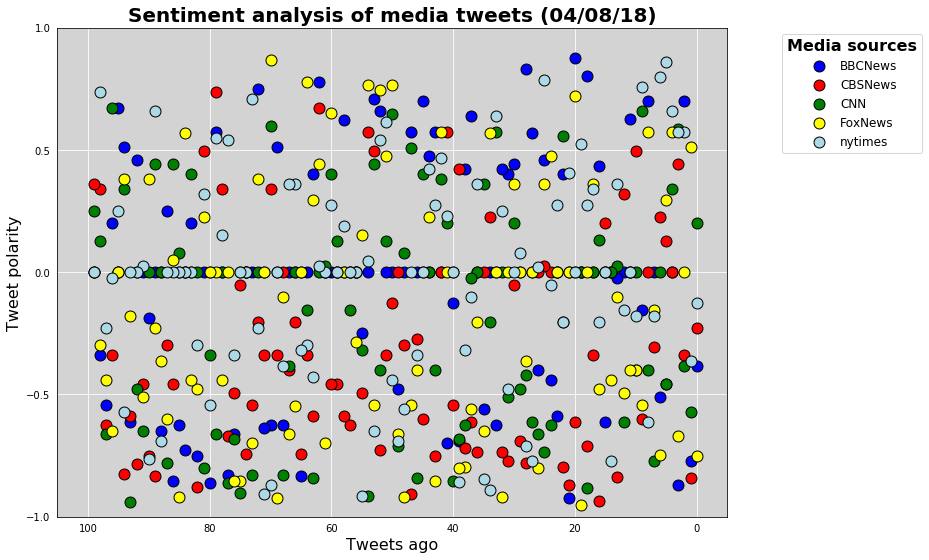

In [18]:
# Initialize colors for news sources
colors = ["blue","red","green","yellow","lightblue"]

# Set grid layout
ax = plt.axes(facecolor='lightgray')
plt.grid(color='w', linestyle='solid')
plt.rcParams['axes.axisbelow'] = True

# Grab data and create scatter plot
for i, media in enumerate(sentiment_df["Twitter account"].unique()):
    x = sentiment_df[sentiment_df["Twitter account"]==media]["Tweets ago"]
    y = sentiment_df[sentiment_df["Twitter account"]==media]["Compound score"]
    plt.scatter(x, y, label = media, color = colors[i], s = 120, edgecolors = "black")

# Format scatter plot
## Set data limits for axes
plt.xlim(-5,105)
plt.ylim(-1,1)

## Set labels and title
plt.xlabel("Tweets ago", fontsize = 16)
plt.ylabel("Tweet polarity", fontsize = 16)
plt.title(f"Sentiment analysis of media tweets {current_date}", fontweight = "bold", fontsize = 20)

## Set ticks for axes
plt.xticks(np.arange(0,110,20))
plt.yticks(np.arange(-1,1.01,0.5))

## Invert x axis as we want it to read from oldest tweet to newest
plt.gca().invert_xaxis()

## Set scatter plot legend
legend = plt.legend(loc="best", bbox_to_anchor=(1.3, 1), ncol=1, #title="Media sources", 
           prop ={"size":12,"weight":"light"})
legend.set_title("Media sources", prop ={"size":16,"weight":"bold"})

# Hide axes ticks
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='off')

## Size and show plot 
plt.rcParams["figure.figsize"] = [12,9]
plt.show()

## Tweets overall sentiment analysis bar plot

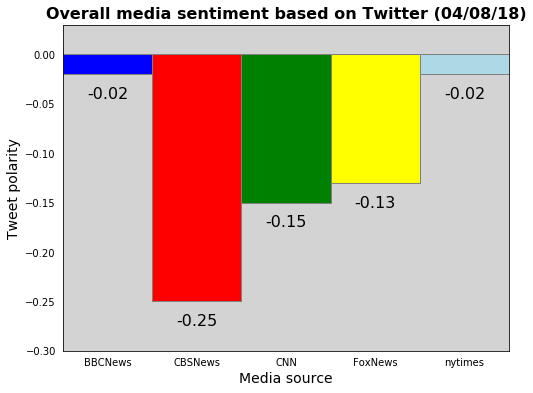

In [23]:
# Calculate overall sentiment per news source and apply to dictionary
sen_dict = {k: round(v.mean(),2) for k,v in sentiment_df.groupby("Twitter account")["Compound score"]}

# Set bar width
barwidth = 1
# Use a gray background
ax = plt.axes(facecolor="lightgray")

# Set x axis
x_axis = np.arange(len(sen_dict))

# Create bar plot
for k,v in sen_dict.items():
    plt.bar(range(len(sen_dict)), sen_dict.values(), color = [colors[i] for i in range(len(sen_dict))],
            width = barwidth, align="edge", edgecolor = "grey")
    
for i, (perc) in enumerate(list(sen_dict.values())):
    plt.text(s = perc, x = i + 0.5*barwidth, y = np.minimum(perc, 0)-0.02,
             color = "black", ha = "center", va = "center", size=16)

# Format bar plot
## Set data limits for axes
plt.xlim(0, len(sen_dict))
plt.ylim(min(sen_dict.values()) - 0.05, max(sen_dict.values()) + 0.05)
## Set ticks for axes
tick_locations = [value + 0.5 for value in x_axis]
plt.xticks(tick_locations, sen_dict.keys())

## Set labels
plt.title(f"Overall media sentiment based on Twitter {current_date}", fontweight = "bold", fontsize = 16)
plt.xlabel("Media source", fontsize = 14)
plt.ylabel("Tweet polarity", fontsize = 14)
## Hide axes ticks
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='off')
## Size and show bar plot
plt.rcParams["figure.figsize"] = [8,6]
plt.show()

## Additional analysis using sentiment groups

I created bins for four ranges of compound scores:

+ score between -1 and -0.5
+ score between -0.5 and 0
+ score between 0 and 0.5
+ score between 0.5 and 1

Next, I totalized the compound ranges per news source and put them in a dataframe.
Finally, I used a pivot table to generate a stacked bar plot showing the total per compound range per news source.

In [47]:
# Define sentiment bins and groups
bins = [-1,-0.5,0,0.5,1]
group_names = ["Between -1 and -0.5", "Between -0.5 and 0", "Between 0 and 0.5", "Between 0.5 and 1"]
# Add column "Sentiment group" to tweets data in sentiment_df
sentiment_df["Sentiment group"] = pd.cut(sentiment_df["Compound score"], bins, right = False, labels=group_names)

In [48]:
sentiment_df.head()

,Compound score,Negative score,Neutral score,Positive score,Tweet,Tweet date,Tweets ago,Twitter account,Sentiment Group,Sentiment group
0,-0.3818,0.272,0.556,0.173,Prostate cancer: Four in 10 cases diagnosed la...,2018-04-08 23:44:27,0,BBCNews,Between -0.5 and 0,Between -0.5 and 0
1,-0.7717,0.489,0.511,0.000,Two men dead after Edgware 'carbon monoxide le...,2018-04-08 18:48:06,1,BBCNews,Between -1 and -0.5,Between -1 and -0.5
2,0.7003,0.000,0.746,0.254,RT @BBCSport: Day 4 - Commonwealth Games #GC20...,2018-04-08 18:20:16,2,BBCNews,Between 0.5 and 1,Between 0.5 and 1
3,-0.8720,0.553,0.447,0.000,Hackney stabbing: Second stab death suspect 'a...,2018-04-08 18:11:22,3,BBCNews,Between -1 and -0.5,Between -1 and -0.5
4,0.0000,0.000,1.000,0.000,RT @BBC_HaveYourSay: Are you coming to Windsor...,2018-04-08 15:51:58,4,BBCNews,Between 0 and 0.5,Between 0 and 0.5


In [73]:
# Calculate totals per sentiment group per news source
sent_groups_df = sentiment_df.groupby(["Twitter account","Sentiment group"])["Compound score"].count()
sent_groups_df = pd.DataFrame(sent_groups_df)
sent_groups_df = sent_groups_df.rename(columns={"Compound score":"Group total"})
sent_groups_df.reset_index(inplace=True)

# Show values for news source BBC
sent_groups_df[sent_groups_df["Twitter account"] == "BBCNews"]

,Twitter account,Sentiment group,Group total
0,BBCNews,Between -1 and -0.5,24
1,BBCNews,Between -0.5 and 0,12
2,BBCNews,Between 0 and 0.5,44
3,BBCNews,Between 0.5 and 1,20


In [77]:
# Create pivot table
sent_groups_pivot_df = sent_groups_df.pivot(index="Sentiment group", columns="Twitter account", values="Group total")
sent_groups_pivot_df

Twitter account,BBCNews,CBSNews,CNN,FoxNews,nytimes
Sentiment group,,,,,
Between -1 and -0.5,24,34,27,27,17
Between -0.5 and 0,12,24,15,21,22
Between 0 and 0.5,44,38,50,39,45
Between 0.5 and 1,20,4,8,13,16


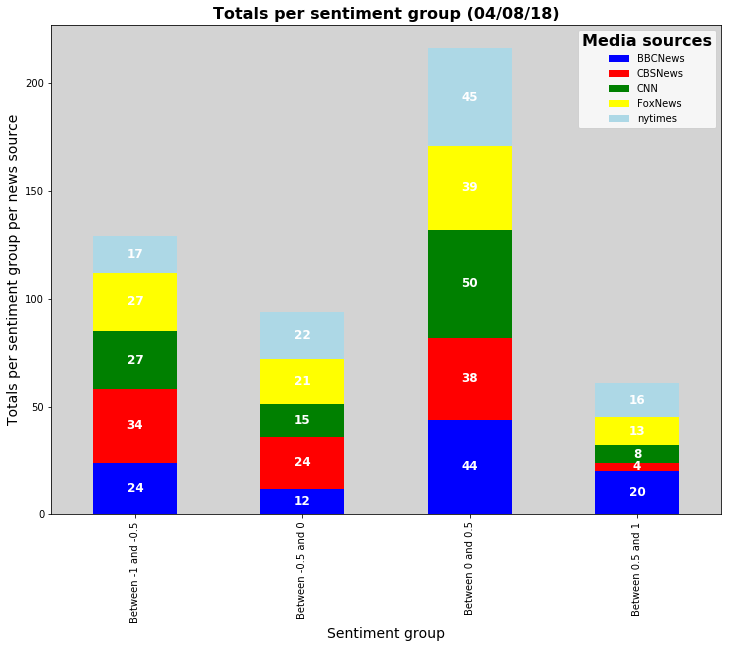

In [280]:
# Create stacked bar plot
colors = ["blue","red","green","yellow","lightblue"]

# Set x axis

sent_groups_list = sent_groups_pivot_df.values.tolist()

ax = sent_groups_pivot_df.plot.bar(stacked=True, color=colors, figsize=(12,9))

for lbl in ax.patches:
    gw = lbl.get_width()
    gh = lbl.get_height()
    gx = lbl.get_x()
    gy = lbl.get_y()
    plt.text(s = gh, x = gx + gw/2, y = gy+gh/2, 
             ha="center", va="center", color="white", fontsize=12, fontweight="bold")

# Use a gray background
ax.set_facecolor("lightgray")     

# Adjust legend
legend = plt.legend()
legend.set_title("Media sources", prop ={"size":16,"weight":"bold"})

## Set labels
plt.title(f"Totals per sentiment group {current_date}", fontweight = "bold", fontsize = 16)
plt.xlabel("Sentiment group", fontsize = 14)
plt.ylabel("Totals per sentiment group per news source", fontsize = 14)

plt.show()